<a href="https://colab.research.google.com/github/MarasaniJhansi/Alzheimer-s-Disease-Classification-using-InceptionV3/blob/main/VGG19Newipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Mounted at /content/drive


In [ ]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/Non_Demented/non_demented_1585.jpg  
  inflating: Datasets/Non_Demented/non_demented_1586.jpg  
  inflating: Datasets/Non_Demented/non_demented_1587.jpg  
  inflating: Datasets/Non_Demented/non_demented_1588.jpg  
  inflating: Datasets/Non_Demented/non_demented_1589.jpg  
  inflating: Datasets/Non_Demented/non_demented_159.jpg  
  inflating: Datasets/Non_Demented/non_demented_1590.jpg  
  inflating: Datasets/Non_Demented/non_demented_1591.jpg  
  inflating: Datasets/Non_Demented/non_demented_1592.jpg  
  inflating: Datasets/Non_Demented/non_demented_1593.jpg  
  inflating: Datasets/Non_Demented/non_demented_1594.jpg  
  inflating: Datasets/Non_Demented/non_demented_1595.jpg  
  inflating: Datasets/Non_Demented/non_demented_1596.jpg  
  inflating: Datasets/Non_Demented/non_demented_1597.jpg  
  inflating: Datasets/Non_Demented/non_demented_1598.jpg  
  inflating: Datasets/Non_Demented/non_demented_1599.jpg  
  infl

In [ ]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=cfaa82600bd8648f173b6508cb126f8827de8255dd786273366cfa7cf3e1c2b3
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
!pip install git+https://github.com/jfilter/split-folders.git

  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-xce1vb8p
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-xce1vb8p
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for split_folders: filename=split_folders-0.5.1-py3-none-any.whl size=8400 sha256=2f6facb60a29342f59af07a8d7abf1e3448e214ffca4bdd07c17de34c1bb2d18
  Stored in directory: /tmp/pip-ephem-wheel-cache-hnc62tly/wheels/0c/da/06/fcebe493adfe604ee9a1d4511e3932a6e63a044edb7a10dec8
Successfully built split_folders


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
import splitfolders

input_folder='/content/Datasets'

output_folder='/content/dataset'

train_ratio=0.8
validation_ratio=0.1
test_ratio=0.1
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

Copying files: 10699 files [00:01, 5991.12 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


#Defining directories for train,validation,test
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=False,
        batch_size =64,
        class_mode ='categorical',
)

Found 8559 images belonging to 4 classes.
Found 1069 images belonging to 4 classes.
Found 1071 images belonging to 4 classes.


In [ ]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


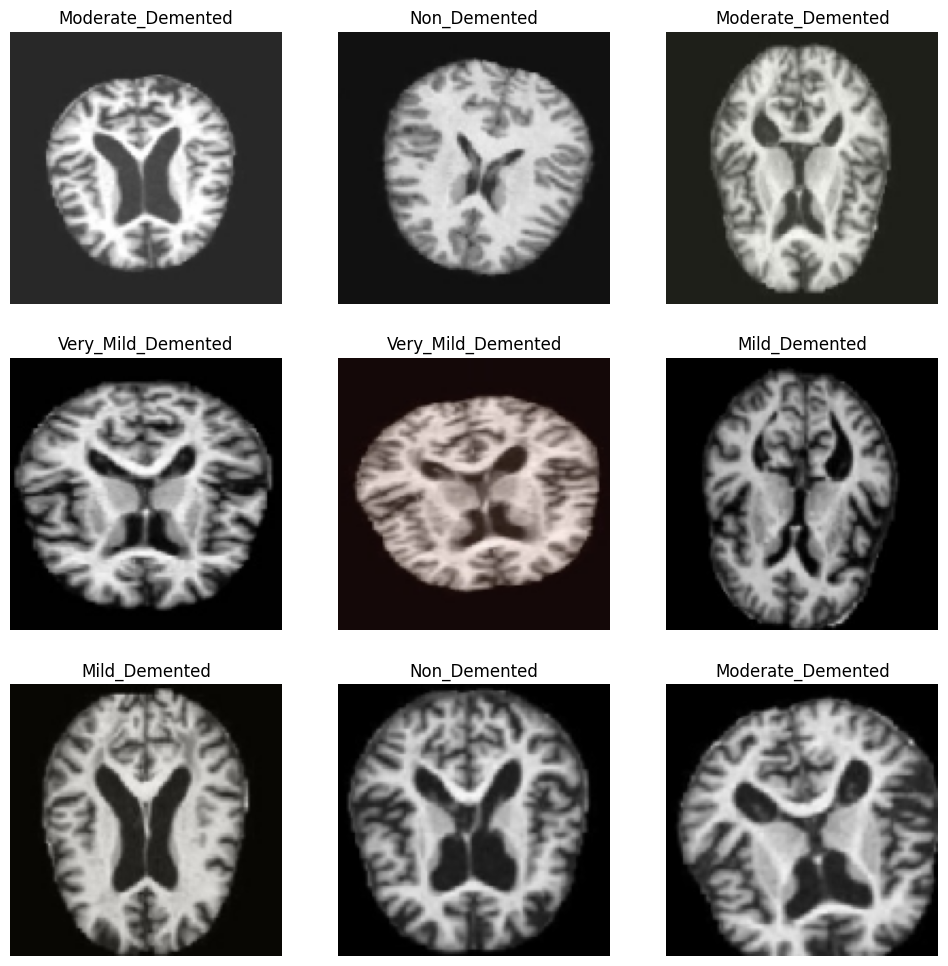

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in train_generator:
#     print(images)
#     print(len(labels))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

In [ ]:
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    return data_augmentation

In [ ]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

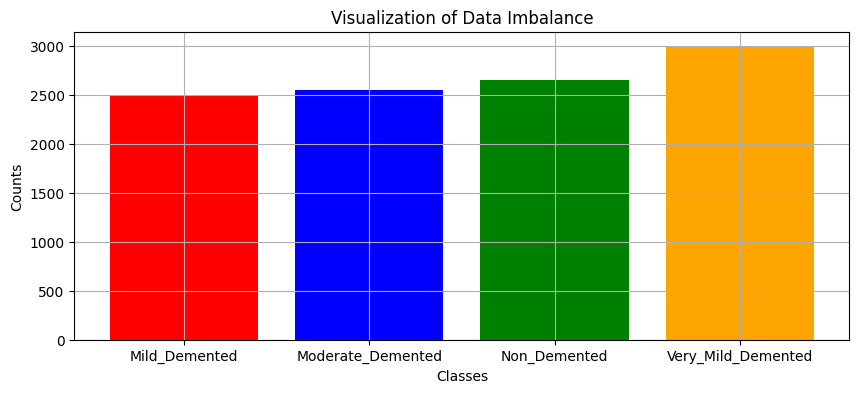

In [ ]:
input_folder='/content/Datasets'

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
colors = ['red', 'blue', 'green', 'orange']
plt.bar(class_count.keys(),class_count.values(),color=colors)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

In [ ]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.07
Weight for class "Moderate_Demented" : 1.05
Weight for class "Non_Demented" : 1.01
Weight for class "Very_Mild_Demented" : 0.89


In [ ]:
filepath = './Vgg_best_weights.hdf5'
earlystopping=EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=15,
                           verbose=1)

checkpoint=ModelCheckpoint(filepath,monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)

callback_list=[earlystopping,checkpoint]

In [ ]:
input_shape = (128,128, 3)

#Create an instance of the VGG16 model
vgg16 = VGG16(include_top=False, input_shape=input_shape,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model with additional layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model = tf.keras.Sequential([vgg16, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)              

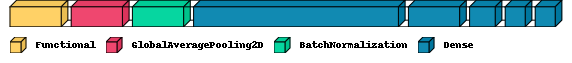

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [ ]:
history=model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
134/134 [==============================] - 64s 388ms/step - loss: 0.9219 - accuracy: 0.5750 - auc: 0.8422 - precision: 0.6914 - recall: 0.4130 - val_loss: 1.2182 - val_accuracy: 0.4387 - val_auc: 0.7201 - val_precision: 1.0000 - val_recall: 0.0140
Epoch 2/20
134/134 [==============================] - 46s 342ms/step - loss: 0.6995 - accuracy: 0.6868 - auc: 0.9099 - precision: 0.7611 - recall: 0.5890 - val_loss: 0.8338 - val_accuracy: 0.6614 - val_auc: 0.9015 - val_precision: 0.9250 - val_recall: 0.3115
Epoch 3/20
134/134 [==============================] - 46s 342ms/step - loss: 0.6136 - accuracy: 0.7299 - auc: 0.9312 - precision: 0.7857 - recall: 0.6593 - val_loss: 0.7039 - val_accuracy: 0.6950 - val_auc: 0.9180 - val_precision: 0.8424 - val_recall: 0.4799
Epoch 4/20
134/134 [==============================] - 46s 343ms/step - loss: 0.5667 - accuracy: 0.7558 - auc: 0.9421 - precision: 0.8025 - recall: 0.6963 - val_loss: 0.5679 - val_accuracy: 0.7652 - val_auc: 0.9421 - val_pre

In [ ]:
result = model.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')

134/134 [==============================] - 43s 319ms/step - loss: 0.1244 - accuracy: 0.9546 - auc: 0.9969 - precision: 0.9596 - recall: 0.9507
Train Loss = 0.12436212599277496
Train Accuracy = 0.9545507431030273
Train AUC = 0.9969468712806702
Train Precision = 0.9595518708229065
Train Recall = 0.9506951570510864


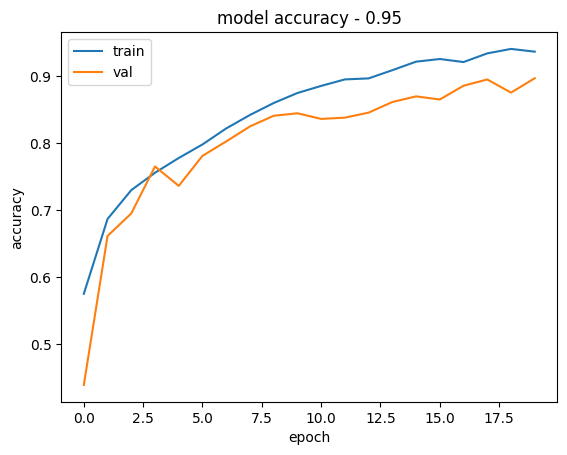

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - ' + str(format(result[1], "0.2f")))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

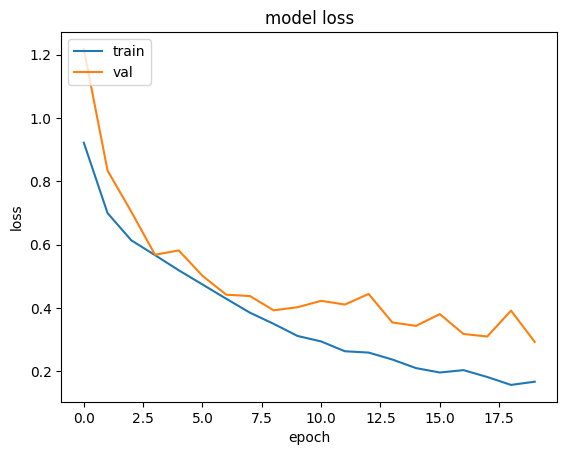

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_label=test_generator.classes
Y_pred=model.predict(test_generator)
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]

17/17 [==============================] - 2s 92ms/step


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
y_pred=np.array(y_pred)
y_pred.shape

(1071,)

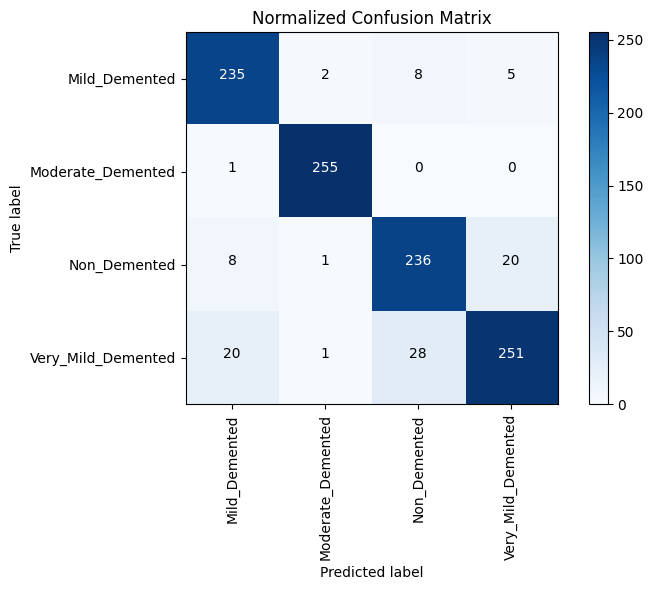

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       250
           1       0.98      1.00      0.99       256
           2       0.87      0.89      0.88       265
           3       0.91      0.84      0.87       300

    accuracy                           0.91      1071
   macro avg       0.91      0.92      0.91      1071
weighted avg       0.91      0.91      0.91      1071



**VGG19**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
input_shape = (128,128, 3)

#Create an instance of the VGG16 model
vgg19 = VGG19(include_top=False, input_shape=input_shape,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg19.layers:
    layer.trainable = False



# Create a new model with additional layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model2 = tf.keras.Sequential([vgg19, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])



model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 2048)              1050624   
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 256)              

In [ ]:
history2=model2.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
134/134 [==============================] - 49s 340ms/step - loss: 0.9621 - accuracy: 0.5587 - auc_2: 0.8282 - precision_2: 0.6907 - recall_2: 0.3739 - val_loss: 1.3691 - val_accuracy: 0.3218 - val_auc_2: 0.6123 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
134/134 [==============================] - 45s 336ms/step - loss: 0.7479 - accuracy: 0.6639 - auc_2: 0.8973 - precision_2: 0.7463 - recall_2: 0.5474 - val_loss: 0.9633 - val_accuracy: 0.6193 - val_auc_2: 0.8631 - val_precision_2: 0.8964 - val_recall_2: 0.2348
Epoch 3/20
134/134 [==============================] - 45s 333ms/step - loss: 0.6641 - accuracy: 0.7029 - auc_2: 0.9194 - precision_2: 0.7714 - recall_2: 0.6163 - val_loss: 0.6837 - val_accuracy: 0.7091 - val_auc_2: 0.9224 - val_precision_2: 0.8413 - val_recall_2: 0.5407
Epoch 4/20
134/134 [==============================] - 45s 333ms/step - loss: 0.6164 - accuracy: 0.7243 - auc_2: 0.9305 - precision_2: 0.7877 - recall_2: 0.6544 - val_loss: 0.6485 

In [ ]:
result = model2.evaluate(test_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')

17/17 [==============================] - 2s 104ms/step - loss: 0.3365 - accuracy: 0.8786 - auc_2: 0.9817 - precision_2: 0.8810 - recall_2: 0.8711
Train Loss = 0.33646440505981445
Train Accuracy = 0.8786181211471558
Train AUC = 0.9817143082618713
Train Precision = 0.8810198307037354
Train Recall = 0.8711484670639038


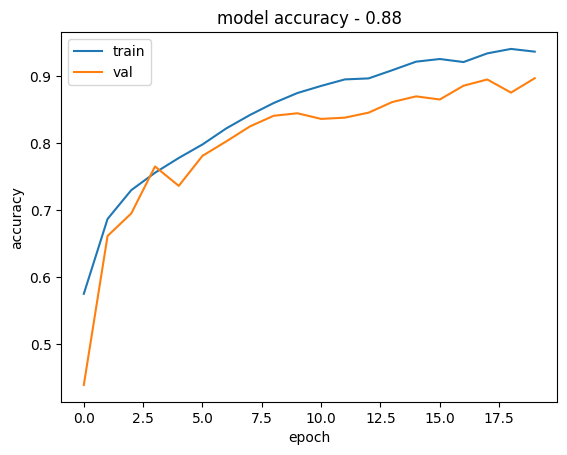

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - ' + str(format(result[1], "0.2f")))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

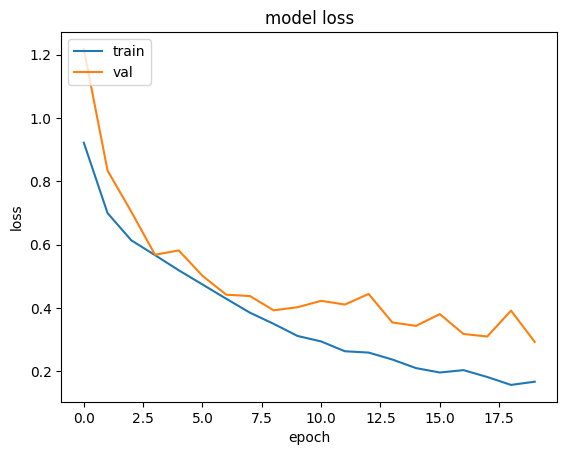

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
Y_pred=model2.predict(test_generator)
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]
y_pred=np.array(y_pred)
y_pred.shape

17/17 [==============================] - 2s 105ms/step


(1071,)

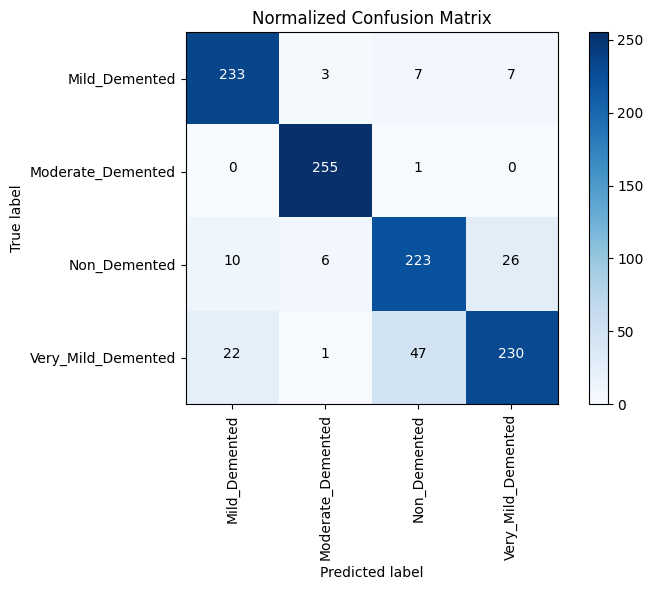

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       250
           1       0.96      1.00      0.98       256
           2       0.80      0.84      0.82       265
           3       0.87      0.77      0.82       300

    accuracy                           0.88      1071
   macro avg       0.88      0.88      0.88      1071
weighted avg       0.88      0.88      0.88      1071

